In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

In [2]:
# Import Dataset
df = pd.read_csv("Datasets/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Converting data to suitable structure
X = np.array(df.iloc[:,:-1])
Y = np.array(df.iloc[:, -1]).reshape((-1, 1))

# Scaling X
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

# Generating random indices to split the data
m, n = X.shape
indices = np.random.permutation(m)
train_size = int(m * 0.8)

# Spliting the data into Train and Test sets
X_train, X_test = X[indices[:train_size], :], X[indices[train_size:], :]
Y_train, Y_test = Y[indices[:train_size], :], Y[indices[train_size:], :]

In [4]:
# Necessary Functions
# Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Prediction of Y for given X and theta
def predict(X, theta):
    X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
    z = np.dot(X, theta)
    return (sigmoid(z) > 0.5) * 1

# Compute Cost Function and Gradient
def costFunction(X, Y, theta):
    m, n = X.shape
    h = sigmoid(np.dot(X, theta))
    J = -(np.dot(Y.T, np.log(h)) + np.dot((1-Y.T), np.log(1-h)))/m
    grad = np.dot(X.T, (h - Y))/m
    return J.flatten()[0], grad

# Gradient Descent Algorithm
def gradientDecsent(X, Y, theta, alpha, num_iters):
    m, n = X.shape
    X = np.append(np.ones((m, 1)), X, axis=1)
    cost_history = []
    
    for i in range(num_iters):
        cost, gradient = costFunction(X, Y, theta)
        theta = theta - (alpha/m) * gradient
        cost_history.append(cost)
        
    return theta, cost_history

# Computing Accuracy of model
def computeAccuracy(X, Y, theta):
    m, n = X.shape
    return np.sum(predict(X, theta) == Y) / m   

In [5]:
# Initializing values of theta
theta = np.zeros((n+1, 1))
alpha = 1
num_iter = 100000

# Applying Gradient Descent
theta, cost_history = gradientDecsent(X_train, Y_train, theta, alpha, num_iter)

In [6]:
# Training and Test Accuracy
train_score = computeAccuracy(X_train, Y_train, theta)
test_score = computeAccuracy(X_test, Y_test, theta)
print(f"Training Accuracy:\t{train_score*100:.2F}%\n" \
      f"Test Accuracy:\t\t{test_score*100:.2F}%")

Training Accuracy:	78.01%
Test Accuracy:		77.92%


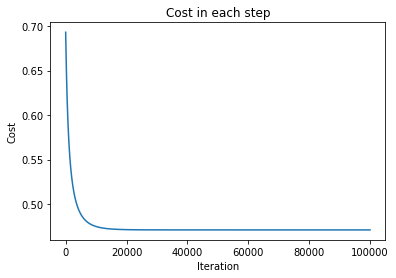

In [7]:
plt.plot(cost_history)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Cost in each step')
plt.show()